In [1]:
import os
from lib.train_AI_lib import *

In [2]:
os.chdir('..')  # Setting current directory to root of repo
print(os.getcwd())

c:\Users\kevin\Documents\GitHub\APS360-2020Summer-Project


In [3]:
''' Code for precalculating alexnet features
trainData, valData, testData = loadData(1, mode='alex')
for data in [trainData, valData, testData]:
    for img, _, imgName, _ in data:
        img = img.squeeze(0)
        torch.save(img, 'temp/alex/'+imgName[0].split('.jpg')[0])
'''

In [4]:
class alexNetA(nn.Module):
  def __init__(self, name):
    super(alexNetA, self).__init__()
    self.name = name
    self.conv1 = nn.Conv2d(256, 50, 5, stride=2)
    self.conv2 = nn.Conv2d(50 , 10, 5, stride=2)
    self.fc1   = nn.Linear(5*5*10, 20)
    self.fc2   = nn.Linear(20, 1)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = x.view(-1, 5*5*10)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return(x)

calcNoParam(alexNetA(''))


337601


Epoch 0 | Time Taken: 23.52s | Training Error: 0.9828341855, Training loss: 27.0144762106 | Validation Error: 0.9736842105, Validation loss: 18.0411082733
Epoch 1 | Time Taken: 3.90s | Training Error: 0.9835646457, Training loss: 16.3438750932 | Validation Error: 0.9912280702, Validation loss: 15.1345066428
Epoch 2 | Time Taken: 3.81s | Training Error: 0.9766252739, Training loss: 13.5346653611 | Validation Error: 0.9678362573, Validation loss: 12.5547009199
Epoch 3 | Time Taken: 3.85s | Training Error: 0.9627465303, Training loss: 11.5369886156 | Validation Error: 0.9502923977, Validation loss: 10.8768563276
Epoch 4 | Time Taken: 4.12s | Training Error: 0.9598246896, Training loss: 10.5755759389 | Validation Error: 0.9532163743, Validation loss: 9.7955066916
Epoch 5 | Time Taken: 3.94s | Training Error: 0.9543462381, Training loss: 9.8141642490 | Validation Error: 0.9444444444, Validation loss: 9.6179865927
Epoch 6 | Time Taken: 3.87s | Training Error: 0.9499634770, Training loss: 9.4

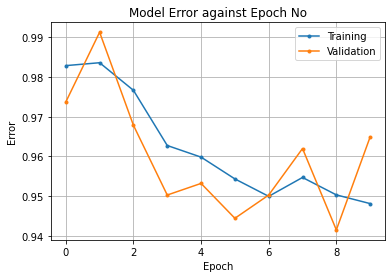

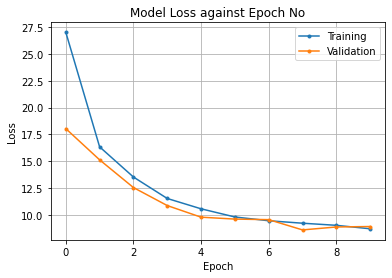

In [5]:
batchsize=64; lr=0.001; epochNo=10
trainLoader, valLoader, testLoader = loadData(batchsize, inPath='temp/alex', mode='tensor')
net = alexNetA("alexNetA"); net.cuda()
netATrain = trainNet(net, [trainLoader, valLoader], batchsize, epochNo, lr, cuda=1)